<a href="https://colab.research.google.com/github/pythonom/Hackathon/blob/main/flood_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd                # 1
import numpy as np                 # 2
import matplotlib.pyplot as plt    # 3

df = pd.read_csv('urban_pluvial_flood_risk_dataset.csv')  # 4

print("Shape (rows, columns):", df.shape)                            # 5
print("\nColumn names:\n", list(df.columns))                         # 6

print(df.head())

print("\nDataFrame info:")                                           # 9
print(df.info())                                                     # 10

df.describe(include='all').T


Shape (rows, columns): (2963, 17)

Column names:
 ['segment_id', 'city_name', 'admin_ward', 'latitude', 'longitude', 'catchment_id', 'elevation_m', 'dem_source', 'land_use', 'soil_group', 'drainage_density_km_per_km2', 'storm_drain_proximity_m', 'storm_drain_type', 'rainfall_source', 'historical_rainfall_intensity_mm_hr', 'return_period_years', 'risk_labels']
  segment_id             city_name    admin_ward   latitude   longitude  \
0  SEG-00001    Colombo, Sri Lanka  Borough East   6.920633   79.912600   
1  SEG-00002        Chennai, India        Ward D  13.076487   80.281774   
2  SEG-00003      Ahmedabad, India     Sector 12  23.019473   72.638578   
3  SEG-00004      Hong Kong, China     Sector 14  22.302602  114.078673   
4  SEG-00005  Durban, South Africa      Sector 5 -29.887602   30.911008   

  catchment_id  elevation_m            dem_source       land_use soil_group  \
0      CAT-136          NaN  Copernicus_EEA-10_v5  Institutional        NaN   
1      CAT-049        -2.19  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
segment_id,2963,2963,SEG-02963,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_name,2963,63,"Manila, Philippines",61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admin_ward,2963,91,Zone V,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,2963.0,NaN,NaN,NaN,19.399103,24.44632,-36.999038,6.580006,23.760802,37.887422,55.821219
longitude,2963.0,NaN,NaN,NaN,31.676123,79.542482,-123.292949,-43.124581,36.889173,101.701136,174.911271
catchment_id,2963,180,CAT-012,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elevation_m,2802.0,NaN,NaN,NaN,37.689818,38.708958,-3.0,8.725,25.13,59.62,266.7
dem_source,2963,5,Copernicus_GLO-30_v2023,869,NaN,NaN,NaN,NaN,NaN,NaN,NaN
land_use,2963,9,Residential,827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
soil_group,2601,4,B,747,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
for i, col in enumerate(df.columns):
    print(f"{i:02d}. {col}")

for col in ['city_name', 'admin_ward', 'risk_labels', 'land_use', 'soil_group']:
    if col in df.columns:
        print(f"\nUnique values sample for '{col}': {df[col].astype(str).unique()[:10]}")


00. segment_id
01. city_name
02. admin_ward
03. latitude
04. longitude
05. catchment_id
06. elevation_m
07. dem_source
08. land_use
09. soil_group
10. drainage_density_km_per_km2
11. storm_drain_proximity_m
12. storm_drain_type
13. rainfall_source
14. historical_rainfall_intensity_mm_hr
15. return_period_years
16. risk_labels

Unique values sample for 'city_name': ['Colombo, Sri Lanka' 'Chennai, India' 'Ahmedabad, India'
 'Hong Kong, China' 'Durban, South Africa' 'Bangkok, Thailand'
 'Nairobi, Kenya' 'Washington DC, USA' 'Vancouver, Canada' 'Delhi, India']

Unique values sample for 'admin_ward': ['Borough East' 'Ward D' 'Sector 12' 'Sector 14' 'Sector 5'
 'Borough Harbor' 'Ward J' 'Zone X' 'District 18' 'Zone II']

Unique values sample for 'risk_labels': ['monitor' 'ponding_hotspot|low_lying|event_2025-05-02'
 'extreme_rain_history' 'low_lying|event_2024-02-14' 'low_lying'
 'ponding_hotspot|extreme_rain_history|low_lying|event_2024-09-25'
 'monitor|event_2022-09-04' 'ponding_hotspot|lo

In [35]:
import re
from collections import Counter

df['risk_tags'] = df['risk_labels'].fillna('').astype(str).apply(lambda s: [t for t in s.split('|') if t])

all_tags = [tag for tags in df['risk_tags'] for tag in tags]
tag_counts = Counter(all_tags)

for tag, cnt in tag_counts.most_common(12):
    print(f" - {tag}: {cnt}")

for tag in ['ponding_hotspot', 'low_lying', 'extreme_rain_history', 'monitor']:
    colname = f"is_{tag}"
    if tag in tag_counts:
        df[colname] = df['risk_tags'].apply(lambda tags: tag in tags)


 - monitor: 1994
 - low_lying: 666
 - extreme_rain_history: 254
 - ponding_hotspot: 222
 - sparse_drainage: 181
 - event_2025-04-08: 3
 - event_2022-12-18: 2
 - event_2025-06-02: 2
 - event_2025-05-19: 2
 - event_2024-02-13: 2
 - event_2024-07-25: 2
 - event_2025-05-25: 2


In [37]:
city_summary = df.groupby('city_name').agg(
    total_segments=('segment_id', 'count'),
    ponding_count=('is_ponding_hotspot', 'sum'),
    lowlying_count=('is_low_lying', 'sum')
).reset_index()

city_summary['pct_ponding'] = city_summary['ponding_count'] / city_summary['total_segments']
city_summary['pct_lowlying'] = city_summary['lowlying_count'] / city_summary['total_segments']

city_summary_sorted = city_summary.sort_values('pct_ponding', ascending=False)
print("Top cities by ponding hotspot percent", city_summary_sorted.head(10))

for _, row in city_summary_sorted.head(10).iterrows():
    print(f"{row['city_name']}: {row['pct_ponding']:.2%} ({int(row['ponding_count'])}/{int(row['total_segments'])})")


Top cities by ponding hotspot percent                city_name  total_segments  ponding_count  lowlying_count  \
12        Chennai, India              50             14              23   
39         Mumbai, India              39             10              16   
0           Accra, Ghana              45             10              15   
56  Singapore, Singapore              54             12              14   
32        Lagos, Nigeria              51             11              20   
35   Manila, Philippines              61             13              26   
37            Miami, USA              46              9              21   
55       Shenzhen, China              48              9              18   
24      Hong Kong, China              34              6              18   
5      Bangkok, Thailand              35              6              11   

    pct_ponding  pct_lowlying  
12     0.280000      0.460000  
39     0.256410      0.410256  
0      0.222222      0.333333  
56     0

Median elevation by low_lying    is_low_lying  elevation_m
0         False       39.710
1          True        0.535


<Figure size 600x400 with 0 Axes>

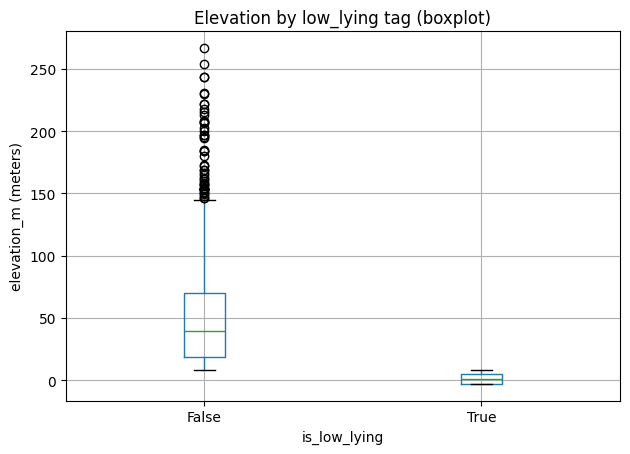

In [38]:
medians = df.groupby('is_low_lying')['elevation_m'].median().reset_index()
print("Median elevation by low_lying", medians)

plt.figure(figsize=(6,4))
df.boxplot(column='elevation_m', by='is_low_lying')
plt.suptitle('')
plt.title('Elevation by low_lying tag (boxplot)')
plt.xlabel('is_low_lying')
plt.ylabel('elevation_m (meters)')
plt.tight_layout()
plt.show()


Drainage density by ponding    is_ponding_hotspot  count  median      mean
0               False   2479   6.280  6.329463
1                True    200   5.585  5.812450


<Figure size 600x400 with 0 Axes>

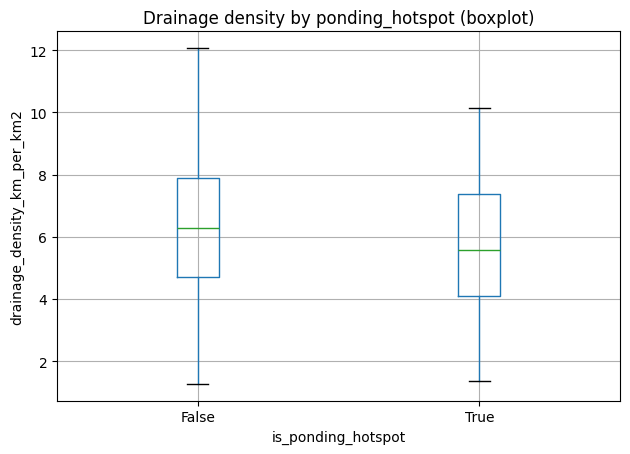

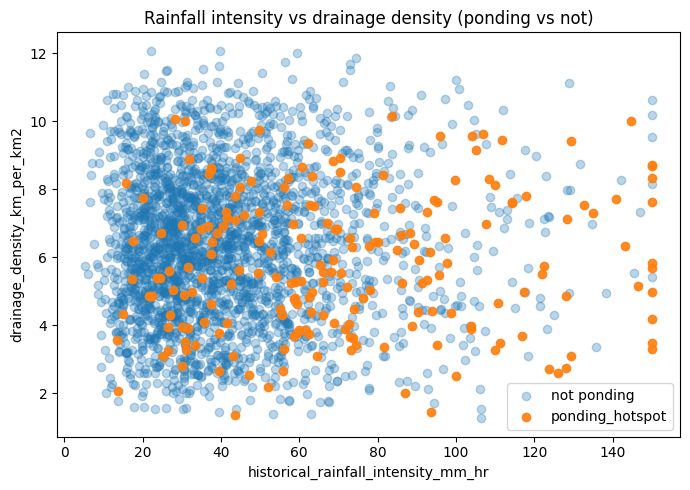

In [41]:
dd_stats = df.groupby('is_ponding_hotspot')['drainage_density_km_per_km2'].agg(['count','median','mean']).reset_index()
print("Drainage density by ponding", dd_stats)

plt.figure(figsize=(6,4))
df.boxplot(column='drainage_density_km_per_km2', by='is_ponding_hotspot')
plt.suptitle('')
plt.title('Drainage density by ponding_hotspot (boxplot)')
plt.xlabel('is_ponding_hotspot')
plt.ylabel('drainage_density_km_per_km2')
plt.tight_layout()
plt.show()

xcol = 'historical_rainfall_intensity_mm_hr'
ycol = 'drainage_density_km_per_km2'
plt.figure(figsize=(7,5))
subset_true = df[df['is_ponding_hotspot']]
subset_false = df[~df['is_ponding_hotspot']]
plt.scatter(subset_false[xcol], subset_false[ycol], alpha=0.3, label='not ponding')
plt.scatter(subset_true[xcol], subset_true[ycol], alpha=0.9, label='ponding_hotspot')
plt.xlabel(xcol)
plt.ylabel(ycol)
plt.title('Rainfall intensity vs drainage density (ponding vs not)')
plt.legend()
plt.tight_layout()
plt.show()


Correlation matrix (numeric cols)                                      latitude  longitude  elevation_m  \
latitude                                1.000     -0.232       -0.009   
longitude                              -0.232      1.000       -0.059   
elevation_m                            -0.009     -0.059        1.000   
drainage_density_km_per_km2             0.025      0.038       -0.016   
storm_drain_proximity_m                 0.027      0.014       -0.015   
historical_rainfall_intensity_mm_hr    -0.153      0.162       -0.181   
return_period_years                    -0.045      0.042       -0.037   

                                     drainage_density_km_per_km2  \
latitude                                                   0.025   
longitude                                                  0.038   
elevation_m                                               -0.016   
drainage_density_km_per_km2                                1.000   
storm_drain_proximity_m                  

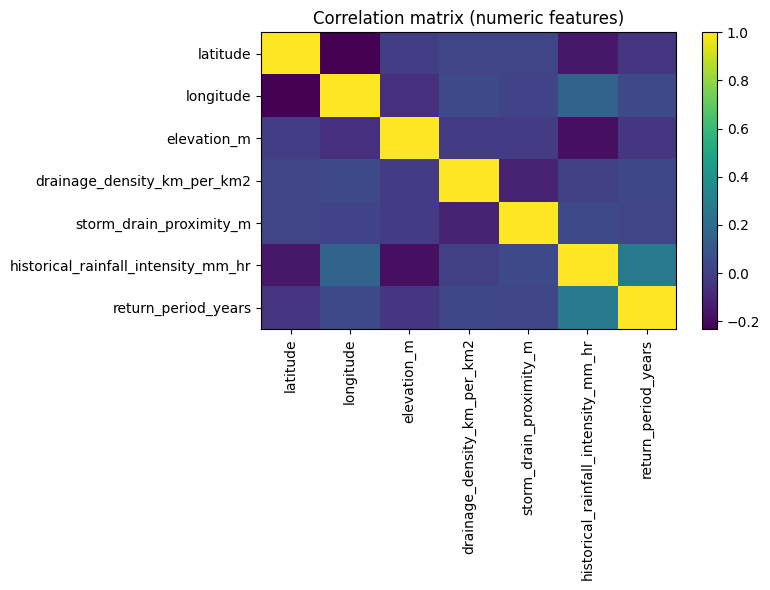

Event years counts: {'2025': 36, '2024': 54, '2022': 36, '2023': 60}


In [42]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[numeric_cols].corr()
print("Correlation matrix (numeric cols)", corr.round(3))

plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Correlation matrix (numeric features)')
plt.tight_layout()
plt.show()

def extract_event_dates(tags):
    events = []
    for t in tags:
        if t.startswith('event_'):
            dt = t.replace('event_','')
            events.append(dt)
    return events

df['event_dates'] = df['risk_tags'].apply(extract_event_dates)
event_dates_flat = [d for sub in df['event_dates'] for d in sub]
event_years = [d.split('-')[0] for d in event_dates_flat if '-' in d]
from collections import Counter as _Counter
year_counts = _Counter(event_years)
print("Event years counts:", dict(year_counts))


In [43]:
def minmax_scale(s):
    s = s.astype(float)
    if s.isnull().all():
        return s
    mn = s.min()
    mx = s.max()
    if mn == mx:
        return s - mn
    return (s - mn) / (mx - mn)

df['num_risk_tags'] = df['risk_tags'].apply(len)

rain_col = 'historical_rainfall_intensity_mm_hr'
dd_col = 'drainage_density_km_per_km2'
prox_col = 'storm_drain_proximity_m'

scaled_rain = minmax_scale(df[rain_col]).fillna(0)
scaled_dd_inv = (1 - minmax_scale(df[dd_col])).fillna(0)
scaled_prox = minmax_scale(df[prox_col]).fillna(0)

df['severity_score'] = (
    0.8 * (df['num_risk_tags'] / (df['num_risk_tags'].max() if df['num_risk_tags'].max()>0 else 1)) +
    0.7 * scaled_rain +
    0.6 * scaled_dd_inv +
    0.3 * scaled_prox
)

top20 = df.sort_values('severity_score', ascending=False).head(20)
print("Top 20 segments by heuristic severity_score", top20[['segment_id','city_name','admin_ward','num_risk_tags','severity_score', rain_col, dd_col, prox_col]])


Top 20 segments by heuristic severity_score      segment_id                  city_name      admin_ward  num_risk_tags  \
329   SEG-00330        Manila, Philippines        Sector 1              5   
483   SEG-00484              Mumbai, India          Ward I              5   
882   SEG-00883           Hong Kong, China  Borough Harbor              5   
1921  SEG-01922          Bangkok, Thailand        Sector 7              4   
2929  SEG-02930            Shenzhen, China         Zone VI              4   
2896  SEG-02897             Chennai, India       Sector 20              3   
2469  SEG-02470       Singapore, Singapore       Sector 18              4   
1370  SEG-01371             Hanoi, Vietnam          Zone X              4   
2658  SEG-02659           Hong Kong, China       Sector 12              4   
900   SEG-00901          Dhaka, Bangladesh          Ward C              4   
2206  SEG-02207             Lagos, Nigeria       Sector 14              3   
2239  SEG-02240        Manila, P

In [44]:
ward_summary = df.groupby(['city_name','admin_ward']).agg(total=('segment_id','count'), ponding=('is_ponding_hotspot','sum')).reset_index()
ward_summary['pct_ponding'] = ward_summary['ponding'] / ward_summary['total']
ward_summary_filtered = ward_summary[ward_summary['total'] >= 5].sort_values('pct_ponding', ascending=False)
print("Top wards by ponding % (min 5 segs)", ward_summary_filtered.head(20))

land_use_tot = df['land_use'].value_counts(normalize=False).rename('total')
land_use_pond = df[df['is_ponding_hotspot']]['land_use'].value_counts(normalize=False).rename('ponding')
land_use_df = pd.concat([land_use_tot, land_use_pond], axis=1).fillna(0)
land_use_df['pct_ponding_given_landuse'] = land_use_df['ponding'] / land_use_df['total']
print("Land-use ponding rates", land_use_df.sort_values('pct_ponding_given_landuse', ascending=False).reset_index().rename(columns={'index':'land_use'}).head(20))


Top wards by ponding % (min 5 segs)                 city_name   admin_ward  total  ponding  pct_ponding
505   Copenhagen, Denmark       Ward F      5        0          0.0
834      Hong Kong, China      Zone VI      5        0          0.0
947     Istanbul, Türkiye       Zone V      5        0          0.0
1231  Mexico City, Mexico  District 28      5        0          0.0
1854   Seoul, South Korea       Zone I      5        0          0.0
Land-use ponding rates         land_use  total  ponding  pct_ponding_given_landuse
0          Mixed    110     12.0                   0.109091
1    Residential    827     73.0                   0.088271
2          Roads    599     49.0                   0.081803
3          Green    359     24.0                   0.066852
4  Institutional    106      7.0                   0.066038
5     Industrial    357     23.0                   0.064426
6          Water     83      5.0                   0.060241
7     Commercial    493     29.0                   0.

In [45]:
missing_pct = df.isna().mean().sort_values(ascending=False)
print("Missing percent per column", missing_pct.reset_index().rename(columns={'index':'column',0:'missing_pct'}))

dups = df.duplicated(subset=['city_name','segment_id']).sum()
print("Number of duplicate rows based on (city_name, segment_id):", int(dups))

unique_seg = df['segment_id'].nunique()
print("Total segments (rows):", df.shape[0], "Unique segment_id:", unique_seg)

def iqr_outlier_mask(s, k=1.5):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return (s < lower) | (s > upper)

for col in ['elevation_m', 'historical_rainfall_intensity_mm_hr', 'storm_drain_proximity_m']:
    if col in df.columns:
        mask = iqr_outlier_mask(df[col].dropna())
        count_outliers = mask.sum()
        pct = count_outliers / df[col].dropna().shape[0]
        print(f"Column {col}: outliers (IQR k=1.5) = {count_outliers} ({pct:.2%} of non-missing)")


Missing percent per column                                  column  missing_pct
0                            soil_group     0.122173
1                       rainfall_source     0.106311
2           drainage_density_km_per_km2     0.095849
3               storm_drain_proximity_m     0.080661
4                      storm_drain_type     0.060074
5                           elevation_m     0.054337
6                            segment_id     0.000000
7                              latitude     0.000000
8                             city_name     0.000000
9                              land_use     0.000000
10                           dem_source     0.000000
11                         catchment_id     0.000000
12                            longitude     0.000000
13                           admin_ward     0.000000
14  historical_rainfall_intensity_mm_hr     0.000000
15                  return_period_years     0.000000
16                          risk_labels     0.000000
17                 